# Problem set 6: Fall 2024
### Siying Chen
Due: Thursday, November 7th at midnight

In [76]:
# Load necessary python libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# For time checks
import time

# Scikit learn models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# Polynomial generator
from sklearn.preprocessing import PolynomialFeatures

# Set random seed, so our results are similar
# Where does 42 come from?
np.random.seed(42)

# Starter functions

In [77]:
# Function to generate linear data experiments
def genLinData(m,n,R2):
    # y = x_1 + x_2 .. x_n + eps
    # X's scaled so the variance of explained part is 1
    # Function choses variance of noise to set theoretical R2 = R2 argument
    sigNoise = np.sqrt(1./n)
    X = np.random.normal(size=(m,n),loc=0,scale=sigNoise)
    noise = np.sqrt((1.-R2)/R2)
    eps = np.random.normal(size=m,loc=0,scale=noise)
    y = np.sum(X,axis=1)+eps
    return X,y

### A little preprocessing

In [78]:
# Set up initial monte-carlo simulation
X, y = genLinData(60,10,0.75)

# Expand features(X) using 2-degree polynomials
poly = PolynomialFeatures(degree=2,include_bias=False)
Xpoly = poly.fit_transform(X)
# A reminder of how big Xpoly is (remember it has cross terms like x1*x2, not just x1^2)
# n + n + n(n-1)/2 = 65
print(Xpoly.shape)

# Set up basic simulation parameters
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction


(60, 65)


### 1. Linear regression

Run a monte-carlo cross-validation for a basic linear regression model using the nmc, and testSize parameters, and cross_Validate() as we usually do.  Report the mean score from both the training and test samples.  Do this for both the (y,X) pair, and the (y,Xpoly) pair.  In each case also report the elapsed time for your entire randomized cross validation experiment.

In [79]:
def monte_carlo_cv(X, y, nmc, testSize):
    train_scores = []
    test_scores = []
    start_time = time.time()

    for _ in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
        model = LinearRegression().fit(X_train, y_train) #find the best coefficients
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)

    elapsed_time_lr = time.time() - start_time
    mean_train_score_lr = np.mean(train_scores)
    mean_test_score_lr = np.mean(test_scores)

    return mean_train_score_lr, mean_test_score_lr, elapsed_time_lr

# Simulations
mean_train_lr, mean_test_lr, elapsed_lr = monte_carlo_cv(X, y, nmc, testSize)
print(f"Original Data: Mean Train Score = {mean_train_lr}, Mean Test Score = {mean_test_lr}, Time Elapsed = {elapsed_lr} seconds")

mean_train_poly_lr, mean_test_poly_lr, elapsed_poly_lr = monte_carlo_cv(Xpoly, y, nmc, testSize)
print(f"Polynomial Data: Mean Train Score = {mean_train_poly_lr}, Mean Test Score = {mean_test_poly_lr}, Time Elapsed = {elapsed_poly_lr} seconds")

Original Data: Mean Train Score = 0.7813515655808841, Mean Test Score = 0.5576463529456432, Time Elapsed = 0.05887174606323242 seconds
Polynomial Data: Mean Train Score = 1.0, Mean Test Score = -0.7345061285250608, Time Elapsed = 0.07294344902038574 seconds


### 2. Stochastic gradient

Now estimate the model using a stochastic gradient system.  Use the scikit-Learn function SGDRegressor().
Set it up with the following parameters.

SGDRegressor(max_iter=500000, tol=1e-6,penalty="None",eta0=0.01,
                    alpha=0.0,learning_rate="adaptive")

Run a randomized cross-validation for both the (y,X) and (y,Xpoly) pairs using the nmc, testSize that you used in the last simulation.  Report the mean train and test scores in both cases.

Also, find the elapsed time for your entire randomized cross validation run.

Finally, try boosting the learning rate, eta, to 1.0 for the (y,Xpoly) case. How did that work?

In [80]:
# Setup for SGD Regressor
def setup_sgd(eta0=0.01):
    return SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=eta0,
                        alpha=0.0, learning_rate="adaptive")

# Function to perform randomized cross-validation
def randomized_cv(X, y, nmc, testSize, eta0=0.01):
    train_scores = []
    test_scores = []
    start_time = time.time()
    sgd = setup_sgd(eta0)

    for _ in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
        sgd.fit(X_train, y_train)
        train_scores.append(sgd.score(X_train, y_train))
        test_scores.append(sgd.score(X_test, y_test))

    elapsed_time_sg = time.time() - start_time
    mean_train_score_sg = np.mean(train_scores)
    mean_test_score_sg = np.mean(test_scores)

    return mean_train_score_sg, mean_test_score_sg, elapsed_time_sg

# For original data
mean_train_sg, mean_test_sg, elapsed_sg = randomized_cv(X, y, nmc, testSize)
print(f"Original Data: Mean Train Score = {mean_train_sg}, Mean Test Score = {mean_test_sg}, Time Elapsed = {elapsed_sg} seconds")

# For polynomial data with eta0=0.01
mean_train_poly_sg, mean_test_poly_sg, elapsed_poly_sg = randomized_cv(Xpoly, y, nmc, testSize)
print(f"Polynomial Data with eta=0.01: Mean Train Score = {mean_train_poly_sg}, Mean Test Score = {mean_test_poly_sg}, Time Elapsed = {elapsed_poly_sg} seconds")

# For polynomial data with boosted eta0=1.0
mean_train_poly_boosted_sg, mean_test_poly_boosted_sg, elapsed_poly_boosted_sg = randomized_cv(Xpoly, y, nmc, testSize, eta0=1.0)
print(f"Polynomial Data with eta=1.0: Mean Train Score = {mean_train_poly_boosted_sg}, Mean Test Score = {mean_test_poly_boosted_sg}, Time Elapsed = {elapsed_poly_boosted_sg} seconds")

Original Data: Mean Train Score = 0.7736008753068555, Mean Test Score = 0.5889445189533761, Time Elapsed = 0.0859231948852539 seconds
Polynomial Data with eta=0.01: Mean Train Score = 0.9885711253996456, Mean Test Score = -0.06286530485668484, Time Elapsed = 1.4898395538330078 seconds
Polynomial Data with eta=1.0: Mean Train Score = -172852834.72047287, Mean Test Score = -336245904.77412874, Time Elapsed = 0.11892843246459961 seconds


### 3. Early stopping

Now, implement an early stopping procedure for the stochastic gradient estimation.  Use the previous parameters for SGDRegressor(), but turn on early_stopping.  Set the validation_fraction to 1/3 of the data set.  Again, run the same randomized cross valiation experiment that you have done before, and report mean scores on training and test data.  Repeat this for (y,X) and (y,Xpoly).  Also, report the elapsed time in for each set of nmc simulations.

Note: Both of these can be pretty slow.  On my laptop machine (5 years old) the (y,Xpoly) run is taking about 5-10 minutes.  Run experiments on your code with much lower values for nmc.  Then when you know things are working take it back to the original value.  It is interesting that early stopping is so slow.

In [81]:
# Setup for SGD Regressor with Early Stopping
def setup_sgd_early_stopping(eta0=0.01):
    return SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=eta0,
                        alpha=0.0, learning_rate="adaptive", early_stopping=True,
                        validation_fraction=1/3, n_iter_no_change=5)

# Function to perform randomized cross-validation with early stopping
def randomized_cv_early_stopping(X, y, nmc, testSize, eta0=0.01):
    train_scores = []
    test_scores = []
    start_time = time.time()
    sgd = setup_sgd_early_stopping(eta0)

    for _ in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
        sgd.fit(X_train, y_train)
        train_scores.append(sgd.score(X_train, y_train))
        test_scores.append(sgd.score(X_test, y_test))

    elapsed_time_es = time.time() - start_time
    mean_train_score_es = np.mean(train_scores)
    mean_test_score_es = np.mean(test_scores)

    return mean_train_score_es, mean_test_score_es, elapsed_time_es

# Define simulation parameters
nmc = 50  # Adjust for quick testing
testSize = 0.25

# For original data
mean_train_es, mean_test_es, elapsed_es= randomized_cv_early_stopping(X, y, nmc, testSize)
print(f"Original Data: Mean Train Score = {mean_train_es}, Mean Test Score = {mean_test_es}, Time Elapsed = {elapsed_es} seconds")

# For polynomial data
mean_train_poly_es, mean_test_poly_es, elapsed_poly_es = randomized_cv_early_stopping(Xpoly, y, nmc, testSize)
print(f"Polynomial Data: Mean Train Score = {mean_train_poly_es}, Mean Test Score = {mean_test_poly_es}, Time Elapsed = {elapsed_poly_es} seconds")

Original Data: Mean Train Score = 0.7086934389924293, Mean Test Score = 0.47643241167618205, Time Elapsed = 11.990851640701294 seconds
Polynomial Data: Mean Train Score = 0.7168117402996191, Mean Test Score = 0.39426261913081523, Time Elapsed = 6.378281116485596 seconds


### 4. Batch gradient descent

Estimate the model using a batch gradient descent model.  See the "earlyStopping" notebook for examples on how to implement this.  (It is tricky in terms of code.)

Do a randomized cross-validation here using the same parameters as before, but this will be tricky because of the way the model gets implemented.  You cannot use cross_validate().  You need to go back to train_test_split(), and loop over the train/test draws as we did the first time in the class with this.  Also, for the batch estimation, use 1000 epochs (or passes through the data).

This means that you will have two loops, one inside the other.  The outer for loop will do a train/test split draw, and the inner one will do a loop on 1000 epochs doing a partial_fit on each epoch (see earlyStopping.ipynb).

-----

for i in range(nmc):

    X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=testSize)
    
    for epoch in range(1000):
    
        sgdr.partial_fit(X_train,y_train)
        
    trainVec[i] = sgdr.score(X_train,y_train)
    
    testVec[i]  = sgdr.score(X_test,y_test)
    
------   

Again, report mean scores on training and testing data, and elapsed time for the entire procedure.

In this case, only use the (y,Xpoly) data.

In [82]:
# Set up the SGD Regressor for batch gradient descent
def setup_sgd_batch(eta0=0.01):
    return SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=eta0,
                        alpha=0.0, learning_rate="constant", warm_start=True)

# Function to perform batch gradient descent with randomized cross-validation
def batch_gradient_descent(X, y, nmc, testSize, epochs=1000, eta0=0.01):
    train_scores = []
    test_scores = []
    start_time = time.time()
    sgdr = setup_sgd_batch(eta0)

    for _ in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
        sgdr = setup_sgd_batch(eta0)  # Reinitialize for each cross-validation iteration

        for epoch in range(epochs):
            sgdr.partial_fit(X_train, y_train)

        train_scores.append(sgdr.score(X_train, y_train))
        test_scores.append(sgdr.score(X_test, y_test))

    elapsed_time_bgd = time.time() - start_time
    mean_train_score_bgd = np.mean(train_scores)
    mean_test_score_bgd = np.mean(test_scores)

    return mean_train_score_bgd, mean_test_score_bgd, elapsed_time_bgd

# Define parameters for simulation
nmc = 10  # Number of Monte Carlo simulations
testSize = 0.25  # Fraction of data to be used as test set

# Use the polynomial features data (y, Xpoly)
mean_train_poly_bgd, mean_test_poly_bgd, elapsed_poly_bgd = batch_gradient_descent(Xpoly, y, nmc, testSize)
print(f"Polynomial Data: Mean Train Score = {mean_train_poly_bgd}, Mean Test Score = {mean_test_poly_bgd}, Time Elapsed = {elapsed_poly_bgd} seconds")

Polynomial Data: Mean Train Score = 0.970499058706665, Mean Test Score = -0.05179630790537584, Time Elapsed = 1.8875455856323242 seconds


### 5. Ridge regression

Now try a ridge regresion with (y, Xpoly) data only.  Perform a grid search (using a for loop) with alpha in the following range.

np.arange(start=0.1,stop=3.0,step=0.1)

For each alpha find the mean train and test scores (R-squared) from a randomized cross-validation (same params as before).

Plot the test and train mean scores against the alpha values.

Record your bestAlpha from the test data.

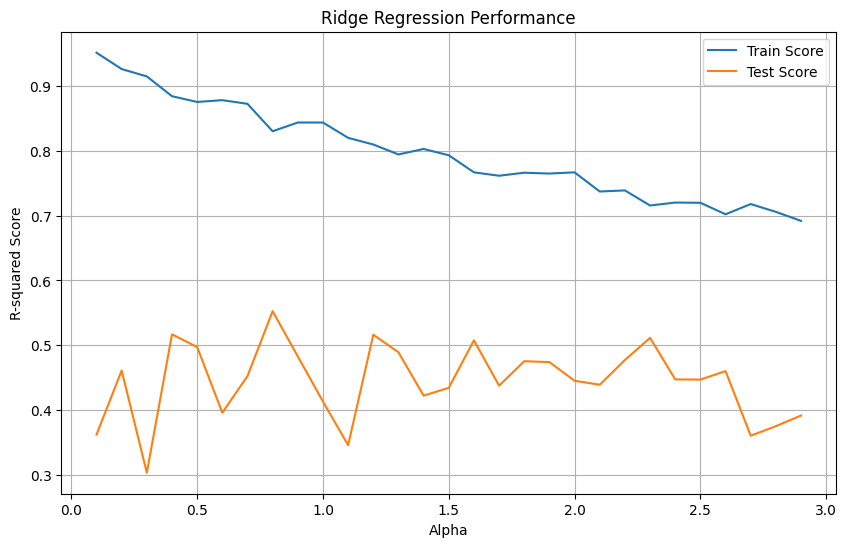

The best alpha from the test data is: 0.8


In [83]:
# Function to perform Ridge regression with randomized cross-validation
def ridge_regression_cv(X, y, alphas, nmc, testSize):
    train_scores = []
    test_scores = []
    
    # Loop through each alpha value
    for alpha in alphas:
        local_train_scores = []
        local_test_scores = []
        
        # Perform randomized cross-validation
        for _ in range(nmc):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
            model = Ridge(alpha=alpha)
            model.fit(X_train, y_train)
            local_train_scores.append(model.score(X_train, y_train))
            local_test_scores.append(model.score(X_test, y_test))
        
        # Calculate mean scores for the current alpha
        train_scores.append(np.mean(local_train_scores))
        test_scores.append(np.mean(local_test_scores))
    
    return train_scores, test_scores

# Parameters
nmc = 10  # Number of Monte Carlo simulations
testSize = 0.25  # Fraction of data to be used as test set
alphas = np.arange(start=0.1, stop=3.0, step=0.1)

# Perform the grid search
train_scores_rg, test_scores_rg = ridge_regression_cv(Xpoly, y, alphas, nmc, testSize)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores_rg, label='Train Score')
plt.plot(alphas, test_scores_rg, label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('Ridge Regression Performance')
plt.legend()
plt.grid(True)
plt.show()

# Finding the best alpha
best_alpha = alphas[np.argmax(test_scores_rg)]
print(f"The best alpha from the test data is: {best_alpha}")

### 6. Ridge regression summary

Run our usual randomized monte-carlo trial for ridge regression using your bestAlpha value.  Same parameters as before.  Do this with only the (y,Xpoly) pairs and report the mean train and test scores.  Also, report the elapsed time.

In [84]:
def ridge_regression_best_alpha(X, y, alpha, nmc, testSize):
    train_scores = []
    test_scores = []
    start_time = time.time()

    # Randomized cross-validation
    for _ in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    elapsed_time = time.time() - start_time
    mean_train_score = np.mean(train_scores)
    mean_test_score = np.mean(test_scores)

    return mean_train_score, mean_test_score, elapsed_time

# Parameters
nmc = 10  # Number of Monte Carlo simulations
testSize = 0.25  # Fraction of data to be used as test set
best_alpha = 1.0  # Replace with your actual bestAlpha obtained from the grid search

# Perform the evaluation
mean_train_score_rgba, mean_test_score_rgba, elapsed_time_rgba = ridge_regression_best_alpha(Xpoly, y, best_alpha, nmc, testSize)
print(f"Ridge Regression with best alpha ({best_alpha}):")
print(f"Mean Train Score: {mean_train_score_rgba}")
print(f"Mean Test Score: {mean_test_score_rgba}")
print(f"Elapsed Time: {elapsed_time_rgba:.2f} seconds")

Ridge Regression with best alpha (1.0):
Mean Train Score: 0.8382314542046405
Mean Test Score: 0.4645487254909245
Elapsed Time: 0.01 seconds


### 7. Discsussion

Compare your results from your various models for the (y,Xpoly) case.  Which model performs best in terms of test R-squared?  What is your overall ranking of models?  (LinearRegression, Stochastic Gradient Descent, Stochastic Gradient Descent with Early Stopping, Batch Gradient Descent, and Ridge regression)

In terms of compute time how do the methods compare?




In [86]:
print(f"""
Comparison of Model Performance on (y, Xpoly):
- The best model in terms of test R-squared is Ridge Regression with a test score of {mean_test_score_rgba:.3f}.
- Overall ranking of models by test performance: 1. Ridge Regression: {mean_test_score_rgba}, 2. Early Stopping with SGD :{mean_test_poly_es}, 3. Batch Gradient Descent: {mean_test_poly_bgd}, 4. Linear Regression: {mean_test_poly_lr:.3f}, 5. Stochastic Gradient Descent:{mean_test_poly_boosted_sg}.

Comparison of Computational Efficiency:
- Ridge Regression is the fastest, taking only {elapsed_time_rgba:.2f} seconds.
- Linear Regression also performs quickly, requiring {elapsed_lr:.2f} seconds.
- Stochastic Gradient Descent's computation time varies; with eta=0.01 it took {elapsed_poly_boosted_sg:.2f} seconds, and with eta=1.0 it was {elapsed_poly_boosted_sg:.2f} seconds.
- Batch Gradient Descent and Early Stopping with SGD are slower, taking {elapsed_poly_bgd:.2f} and {elapsed_poly_es:.2f} seconds respectively.
""")



Comparison of Model Performance on (y, Xpoly):
- The best model in terms of test R-squared is Ridge Regression with a test score of 0.465.
- Overall ranking of models by test performance: 1. Ridge Regression: 0.4645487254909245, 2. Early Stopping with SGD :0.39426261913081523, 3. Batch Gradient Descent: -0.05179630790537584, 4. Linear Regression: -0.735, 5. Stochastic Gradient Descent:-336245904.77412874.

Comparison of Computational Efficiency:
- Ridge Regression is the fastest, taking only 0.01 seconds.
- Linear Regression also performs quickly, requiring 0.06 seconds.
- Stochastic Gradient Descent's computation time varies; with eta=0.01 it took 0.12 seconds, and with eta=1.0 it was 0.12 seconds.
- Batch Gradient Descent and Early Stopping with SGD are slower, taking 1.89 and 6.38 seconds respectively.

